In [0]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_images = pickle.load(open('/content/drive/My Drive/full_CNN_train.p', "rb" ))
labels = pickle.load(open('/content/drive/My Drive/full_CNN_labels.p', "rb" ))

train_images = np.array(train_images)
labels = np.array(labels)
# labels = labels / 255

In [0]:
train_images, labels = shuffle(train_images, labels)
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

In [0]:
epochs = 25
pool_size = (2, 2)

In [0]:
input_shape = X_train.shape[1:]

In [0]:
model = Sequential()

model.add(BatchNormalization(input_shape=input_shape))
# Conv Layer 1
model.add(Conv2D(8, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv1'))

# Conv Layer 2
model.add(Conv2D(16, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv2'))

# Pooling 1
model.add(MaxPooling2D(pool_size=pool_size))

# Conv Layer 3
model.add(Conv2D(16, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv3'))
model.add(Dropout(0.2))

# Conv Layer 4
model.add(Conv2D(32, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(Dropout(0.2))

# Conv Layer 5
model.add(Conv2D(32, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv5'))
model.add(Dropout(0.2))

# Pooling 2
model.add(MaxPooling2D(pool_size=pool_size))

# Conv Layer 6
model.add(Conv2D(64, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(Dropout(0.2))

# Conv Layer 7
model.add(Conv2D(64, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(Dropout(0.2))

# Pooling 3
model.add(MaxPooling2D(pool_size=pool_size))

# Upsample 1
model.add(UpSampling2D(size=pool_size))

# Deconv 1
model.add(Conv2DTranspose(64, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(Dropout(0.2))

# Deconv 2
model.add(Conv2DTranspose(64, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(Dropout(0.2))

# Upsample 2
model.add(UpSampling2D(size=pool_size))

# Deconv 3
model.add(Conv2DTranspose(32, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(Dropout(0.2))

# Deconv 4
model.add(Conv2DTranspose(32, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(Dropout(0.2))

# Deconv 5
model.add(Conv2DTranspose(16, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(Dropout(0.2))

# Upsample 3
model.add(UpSampling2D(size=pool_size))

# Deconv 6
model.add(Conv2DTranspose(16, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Deconv6'))

# Final layer - only including one channel so 1 filter
model.add(Conv2DTranspose(1, (3, 3), padding='same', strides=(1,1), activation = 'relu', name = 'Final'))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [0]:
model.fit(X_train,
          y_train,
          epochs=epochs,
          validation_data=(X_val, y_val))



Train on 11487 samples, validate on 1277 samples
Epoch 1/25
11487/11487 [==============================] - 21s 2ms/step - loss: 2846.2848 - val_loss: 1968.6560
Epoch 2/25
11487/11487 [==============================] - 14s 1ms/step - loss: 822.0669 - val_loss: 1220.4439
Epoch 3/25
11487/11487 [==============================] - 14s 1ms/step - loss: 602.7397 - val_loss: 985.5217
Epoch 4/25
11487/11487 [==============================] - 13s 1ms/step - loss: 519.4518 - val_loss: 731.2033
Epoch 5/25
11487/11487 [==============================] - 13s 1ms/step - loss: 474.1401 - val_loss: 552.6922
Epoch 6/25
11487/11487 [==============================] - 13s 1ms/step - loss: 447.0546 - val_loss: 598.0472
Epoch 7/25
11487/11487 [==============================] - 13s 1ms/step - loss: 426.3618 - val_loss: 519.1016
Epoch 8/25
11487/11487 [==============================] - 13s 1ms/step - loss: 410.7453 - val_loss: 474.9360
Epoch 9/25
11487/11487 [==============================] - 13s 1ms/step - l

фото дороги


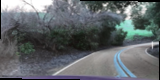

разметка


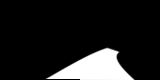

предсказанная разметка


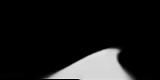

In [0]:
original_img = train_images[0]
print('фото дороги')
cv2_imshow(original_img)

label_img = labels[0]
print('разметка')
cv2_imshow(label_img)

predicted_img = model.predict(original_img[None, :,:,:])[0]
print('предсказанная разметка')
cv2_imshow(predicted_img)

Собираем тестовый датасет из видео: https://www.youtube.com/watch?v=6q5_A5wOwDM

In [0]:
cap = cv2.VideoCapture('/content/drive/My Drive/videoplayback.mp4')

In [0]:
X_test = []
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    # cv2_imshow(frame)
    X_test.append(frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [0]:
X_train[0].shape

(80, 160, 3)

In [0]:
X_test[0].shape

(360, 640, 3)

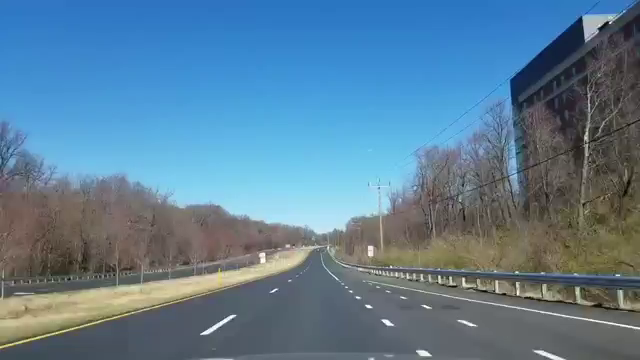

In [0]:
cv2_imshow(X_test[0])

In [0]:
img = cv2.resize(X_test[0], (160,80))

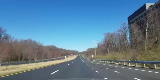

In [0]:
cv2_imshow(img)

In [0]:
resized = [cv2.resize(foto, (160,80)) for foto in X_test]

фото дороги


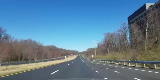

предсказанная разметка


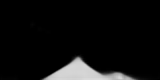

In [0]:
original_img = resized[0]
print('фото дороги')
cv2_imshow(original_img)

predicted_img = model.predict(original_img[None, :,:,:])[0]
print('предсказанная разметка')
cv2_imshow(predicted_img)

фото дороги


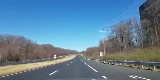

предсказанная разметка


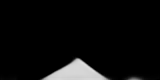

In [0]:
original_img = resized[50]
print('фото дороги')
cv2_imshow(original_img)

predicted_img = model.predict(original_img[None, :,:,:])[0]
print('предсказанная разметка')
cv2_imshow(predicted_img)

фото дороги


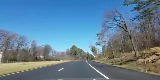

предсказанная разметка


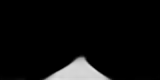

In [0]:
original_img = resized[800]
print('фото дороги')
cv2_imshow(original_img)

predicted_img = model.predict(original_img[None, :,:,:])[0]
print('предсказанная разметка')
cv2_imshow(predicted_img)

In [0]:
test = cv2.VideoCapture('/content/drive/My Drive/testvideo.mp4')

In [0]:
X_test_1 = []
if (test.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(test.isOpened()):
  # Capture frame-by-frame
  ret, frame = test.read()
  if ret == True:
 
    # Display the resulting frame
    # cv2_imshow(frame)
    X_test_1.append(frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
test.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [0]:
resized_dark = [cv2.resize(foto, (160,80)) for foto in X_test_1]

фото дороги


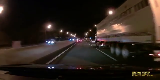

предсказанная разметка


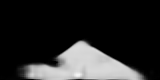

In [0]:
original_img = resized_dark[50]
print('фото дороги')
cv2_imshow(original_img)

predicted_img = model.predict(original_img[None, :,:,:])[0]
print('предсказанная разметка')
cv2_imshow(predicted_img)

фото дороги


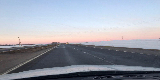

предсказанная разметка


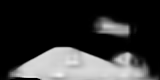

In [0]:
original_img = cv2.resize(cv2.imread('test.jpg'), (160,80))
print('фото дороги')
cv2_imshow(original_img)

predicted_img = model.predict(original_img[None, :,:,:])[0]
print('предсказанная разметка')
cv2_imshow(predicted_img)